<a href="https://colab.research.google.com/github/dataskeptic/similarities/blob/main/tf_tfidf__tok2vec_jaccard_distances_lemma_poo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download pt_core_news_lg

2023-08-31 17:16:47.714595: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-31 17:16:50.222976: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 2.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')


In [ ]:
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
import pandas as pd
import numpy as np
import nltk
import re
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import spacy
nlp = spacy.load('pt_core_news_lg')

In [ ]:
def to_lowercase(data):
    return data.str.lower()

def remove_punct(data):
    return data.str.replace(r'[^\w\s]', ' ', regex=True)

def remove_stopwords(text):
    stop_words = set(stopwords.words('portuguese'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text, language='portuguese')
    return ' '.join([lemmatizer.lemmatize(token) for token in tokens])

def stem(text):
    stemmer = SnowballStemmer('portuguese')
    tokens = word_tokenize(text, language='portuguese')
    return ' '.join([stemmer.stem(token) for token in tokens])

def preprocess_text(data):
    data = remove_punct(data)
    data = to_lowercase(data)
    data = data.apply(remove_stopwords)
    data = data.apply(lemmatize)
    #data = data.apply(stem)
    return data


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

path_reference_answers = "drive/MyDrive/PIBIC/data/poo/reference_answers_extended.xlsx"
path_student_answers = "drive/MyDrive/PIBIC/data/poo/student_answers.xlsx"

reference_answers = pd.read_excel(path_reference_answers)
student_answers = pd.read_excel(path_student_answers)

print(reference_answers.head())
print("---------------------------------------")
print(student_answers)

   question_id                                        refans_text  \
0            1  Polimorfismo é uma característica das linguage...   
1            1  Polimorfismo é a capacidade de uma classe se c...   
2            1  Polimorfismo refere-se à capacidade de um méto...   
3            1  Em programação orientada a objetos, polimorfis...   
4            1  O polimorfismo é um conceito em programação or...   

                                           enunciado  
0  Sobre Orientação a Objetos, descreva o que voc...  
1  Sobre Orientação a Objetos, descreva o que voc...  
2  Sobre Orientação a Objetos, descreva o que voc...  
3  Sobre Orientação a Objetos, descreva o que voc...  
4  Sobre Orientação a Objetos, descreva o que voc...  
---------------------------------------
     question_id                                        answer_text  notas
0              1  Polimorfismo é, como o nome sugere (múltiplas ...   1.11
1              2  Classes são modelos/"estruturas" de coisas tra.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

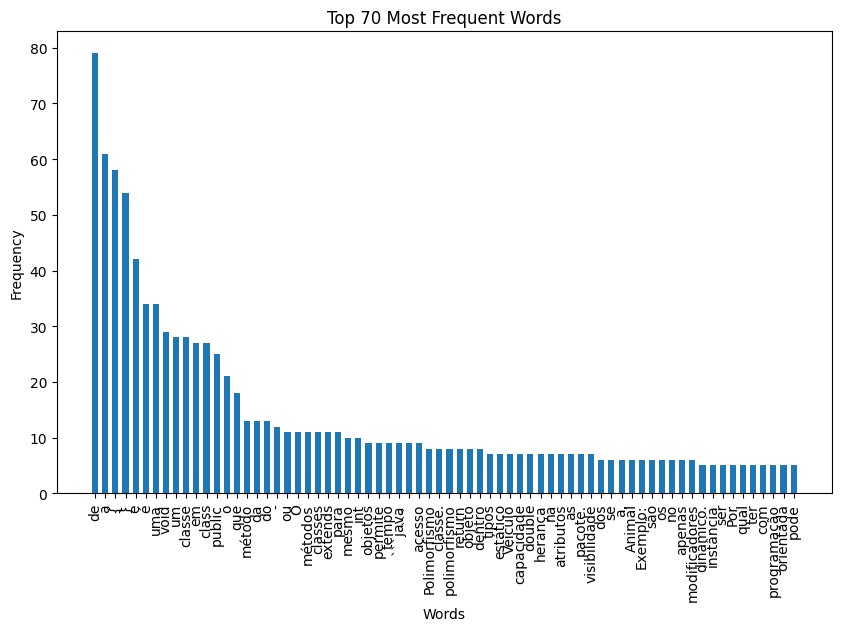

In [ ]:
all_words = [word for tokens in reference_answers['refans_text'] for word in tokens.split()]
word_frequency = Counter(all_words)
most_common_words = word_frequency.most_common()

top_n = 70  # You can adjust the number of most frequent words to plot
words, frequencies = zip(*most_common_words[:top_n])
plt.figure(figsize=(10, 6))

plt.bar(words, frequencies,width=0.6)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Words'.format(top_n))
plt.xticks(rotation=90)
plt.show()

In [ ]:
reference_answers['refans_preprocess'] = preprocess_text(reference_answers['refans_text'])

In [ ]:
print(reference_answers)

    question_id                                        refans_text  \
0             1  Polimorfismo é uma característica das linguage...   
1             1  Polimorfismo é a capacidade de uma classe se c...   
2             1  Polimorfismo refere-se à capacidade de um méto...   
3             1  Em programação orientada a objetos, polimorfis...   
4             1  O polimorfismo é um conceito em programação or...   
5             2  Classe são modelos descritivos para a criação ...   
6             2  Uma classe é uma descrição abstrata de um tipo...   
7             2  Classes são estruturas fundamentais em program...   
8             2  Em linguagens orientadas a objetos, uma classe...   
9             2  Classes em programação orientada a objetos ser...   
10            3  Herança é um conceito que permite que uma clas...   
11            3  Herança na programação orientada a objetos é u...   
12            3  Herança é um mecanismo que permite que uma nov...   
13            3  Her

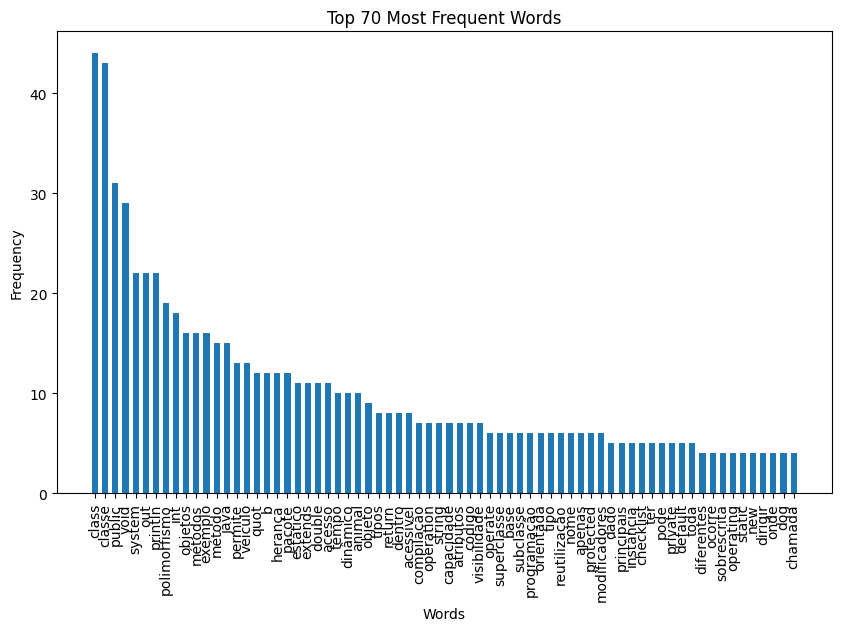

In [ ]:
all_words = [word for tokens in reference_answers['refans_preprocess'] for word in tokens.split()]
word_frequency = Counter(all_words)
most_common_words = word_frequency.most_common()

top_n = 70  # You can adjust the number of most frequent words to plot
words, frequencies = zip(*most_common_words[:top_n])
plt.figure(figsize=(10, 6))

plt.bar(words, frequencies,width=0.6)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Words'.format(top_n))
plt.xticks(rotation=90)
plt.show()

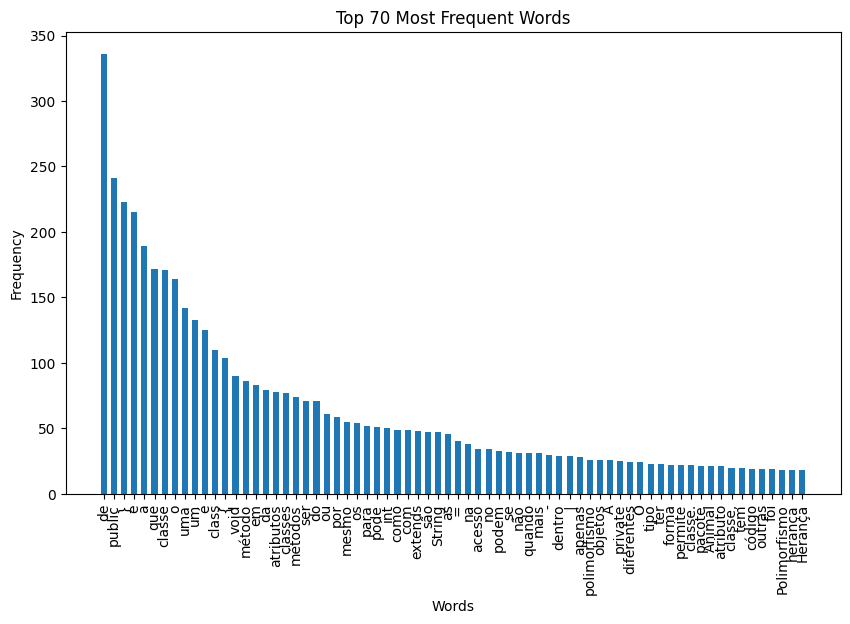

In [ ]:
all_words = [word for tokens in student_answers['answer_text'] for word in tokens.split()]
word_frequency = Counter(all_words)
most_common_words = word_frequency.most_common()

top_n = 70  # You can adjust the number of most frequent words to plot
words, frequencies = zip(*most_common_words[:top_n])
plt.figure(figsize=(10, 6))

plt.bar(words, frequencies,width=0.6)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Words'.format(top_n))
plt.xticks(rotation=90)
plt.show()

In [ ]:
student_answers['answer_text'] = student_answers['answer_text'].fillna('')

In [ ]:
student_answers['answer_preprocess'] = preprocess_text(student_answers['answer_text'])

In [ ]:
print(student_answers['answer_preprocess'])

0      polimorfismo nome sugere múltiplas formas mane...
1      class modelos estruturas coisas transcritos có...
2      herança poo bem fácil entendida olhada context...
3      possíveis modificadores acesso 4 public privat...
4      polimorfismo estático permite criemos exemplo ...
                             ...                        
119                                              nao sei
120    polimorfismo permite partir contrato definido ...
121    class estruturas dado reunem conjunto métodos ...
122    herança permite atributos métodos classe incor...
123    public permite qualquer método atributo classe...
Name: answer_preprocess, Length: 124, dtype: object


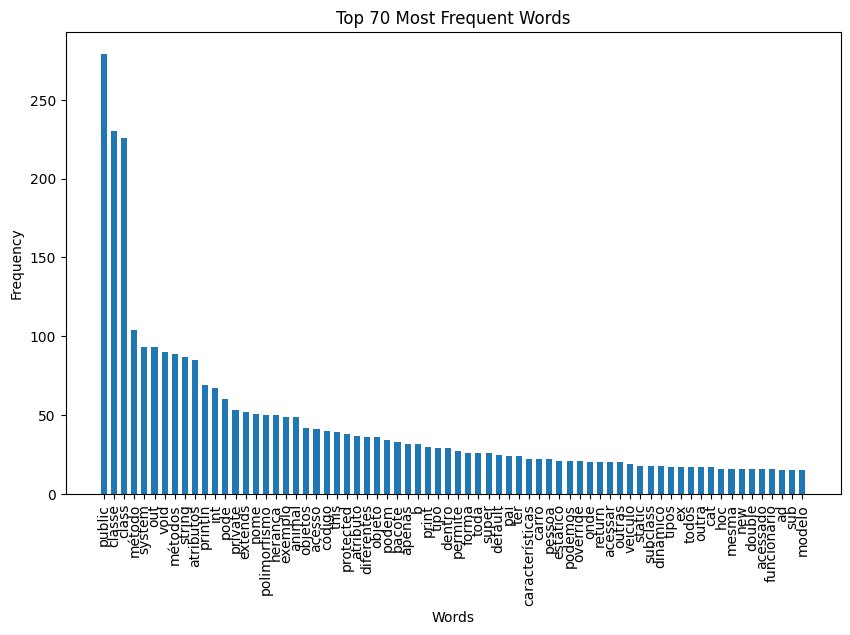

In [ ]:
all_words = [word for tokens in student_answers['answer_preprocess'] for word in tokens.split()]
word_frequency = Counter(all_words)
most_common_words = word_frequency.most_common()

top_n = 70  # You can adjust the number of most frequent words to plot
words, frequencies = zip(*most_common_words[:top_n])
plt.figure(figsize=(10, 6))

plt.bar(words, frequencies,width=0.6)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Words'.format(top_n))
plt.xticks(rotation=90)
plt.show()

In [ ]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
tf_vectorizer = CountVectorizer()

In [ ]:
tf_tfidf_similarities = pd.DataFrame()

for questionId in range(1, 5):
  temp_student_answers = student_answers[student_answers['question_id'] ==  questionId].copy()
  refans_tfidf = tfidf_vectorizer.fit_transform(reference_answers['refans_preprocess'][reference_answers['question_id'] == questionId].copy())
  refans_tf = tf_vectorizer.fit_transform(reference_answers['refans_preprocess'][reference_answers['question_id'] == questionId].copy())

  for index, row in temp_student_answers.iterrows():
    temp_answer_tfidf = tfidf_vectorizer.transform([temp_student_answers['answer_preprocess'][index]])
    temp_answer_tf = tf_vectorizer.transform([temp_student_answers['answer_preprocess'][index]])

    tfidf_cosine_similarity = ([(cosine_similarity(temp_answer_tfidf, ref_tfidf)[0][0]) for ref_tfidf in refans_tfidf])
    tf_cosine_similarity = ([(cosine_similarity(temp_answer_tf, ref_tf)[0][0]) for ref_tf in refans_tf])
    tfidf_similarities = max(tfidf_cosine_similarity), np.mean(tfidf_cosine_similarity), np.median(tfidf_cosine_similarity), min(tfidf_cosine_similarity)
    tf_similarities = max(tf_cosine_similarity), np.mean(tf_cosine_similarity), np.median(tf_cosine_similarity), min(tf_cosine_similarity)

    temp_student_answers.loc[index, ('max_cosine_tfidf', 'mean_cosine_tfidf', 'median_cosine_tfidf', 'min_cosine_tfidf')] = tfidf_similarities
    temp_student_answers.loc[index, ('max_cosine_tf', 'mean_cosine_tf', 'median_cosine_tf', 'min_cosine_tf')] = tf_similarities

  tf_tfidf_similarities = pd.concat([tf_tfidf_similarities, temp_student_answers])
print(tf_tfidf_similarities[['max_cosine_tfidf', 'mean_cosine_tfidf', 'median_cosine_tfidf', 'min_cosine_tfidf']])
print(tf_tfidf_similarities[['max_cosine_tf', 'mean_cosine_tf', 'median_cosine_tf', 'min_cosine_tf']])

     max_cosine_tfidf  mean_cosine_tfidf  median_cosine_tfidf  \
0            0.364222           0.284979             0.294287   
4            0.405547           0.299139             0.278221   
8            0.151021           0.115300             0.108483   
12           0.430630           0.293626             0.250345   
16           0.482816           0.328297             0.318534   
..                ...                ...                  ...   
107          0.342290           0.196993             0.225655   
111          0.377965           0.316244             0.320858   
115          0.426232           0.263564             0.244006   
119          0.000000           0.000000             0.000000   
123          0.396706           0.303828             0.310014   

     min_cosine_tfidf  
0            0.178298  
4            0.189192  
8            0.089004  
12           0.154633  
16           0.152958  
..                ...  
107          0.082236  
111          0.226410  
115

In [ ]:
def jaccard_similarity(sentence1, sentence2):
    # Tokenize the sentences
    set1 = set(sentence1.split())
    set2 = set(sentence2.split())

    # Calculate intersection and union of the two sets
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))

    # Calculate Jaccard similarity
    return intersection / union if union != 0 else 0

In [ ]:
jaccard_similarities = pd.DataFrame()

for questionId in range(1, 16):
  temp_student_answers = student_answers[student_answers['question_id'] ==  questionId].copy()
  refans = reference_answers['refans_preprocess'][reference_answers['question_id'] == questionId].copy()

  for index, row in temp_student_answers.iterrows():
    temp_answer = temp_student_answers['answer_preprocess'][index]
    jaccard_scores = ([(jaccard_similarity(temp_answer, ref)) for ref in refans])
    similarities = max(jaccard_scores),  np.mean(jaccard_scores), np.median(jaccard_scores), min(jaccard_scores)
    temp_student_answers.loc[index, ('max_jaccard', 'mean_jaccard', 'median_jaccard', 'min_jaccard')] = similarities

  jaccard_similarities = pd.concat([jaccard_similarities, temp_student_answers])
print(jaccard_similarities[['max_jaccard', 'mean_jaccard', 'median_jaccard', 'min_jaccard']])

     max_jaccard  mean_jaccard  median_jaccard  min_jaccard
0       0.183486      0.168976        0.171875     0.150442
4       0.174603      0.157875        0.158537     0.140625
8       0.081967      0.074297        0.071429     0.068966
12      0.137931      0.130025        0.132353     0.114286
16      0.139535      0.126458        0.132530     0.108434
..           ...           ...             ...          ...
107     0.285714      0.244875        0.260870     0.195122
111     0.333333      0.284178        0.280000     0.232558
115     0.166667      0.131502        0.128571     0.086207
119     0.000000      0.000000        0.000000     0.000000
123     0.260000      0.224443        0.236364     0.175439

[124 rows x 4 columns]


In [ ]:
tok2vec_similarities = pd.DataFrame()

for questionId in range(1, 16):
  temp_student_answers = student_answers[student_answers['question_id'] ==  questionId].copy()
  refans_tok2vec = (reference_answers['refans_preprocess'][reference_answers['question_id'] == questionId].copy())
  refans_tok2vec = [nlp(ref) for ref in refans_tok2vec]

  for index, row in temp_student_answers.iterrows():

    temp_answer_tok2vec = nlp(temp_student_answers['answer_preprocess'][index])

    tok2vec_cosine_similarity = ([temp_answer_tok2vec.similarity(ref_tok2vec) for ref_tok2vec in refans_tok2vec])
    similarities = max(tok2vec_cosine_similarity), np.mean(tok2vec_cosine_similarity), np.median(tok2vec_cosine_similarity), min(tok2vec_cosine_similarity)

    temp_student_answers.loc[index, ('max_cosine_tok2vec', 'mean_cosine_tok2vec', 'median_cosine_tok2vec', 'min_cosine_tok2vec')] = similarities

  tok2vec_similarities = pd.concat([tok2vec_similarities, temp_student_answers])
print(tok2vec_similarities[['max_cosine_tok2vec', 'mean_cosine_tok2vec', 'median_cosine_tok2vec', 'min_cosine_tok2vec']])

     max_cosine_tok2vec  mean_cosine_tok2vec  median_cosine_tok2vec  \
0              0.877774             0.871270               0.876417   
4              0.901621             0.882025               0.880454   
8              0.735859             0.700877               0.720335   
12             0.892483             0.838012               0.820904   
16             0.850338             0.803083               0.799803   
..                  ...                  ...                    ...   
107            0.870243             0.827323               0.852017   
111            0.901709             0.855853               0.881534   
115            0.923503             0.894715               0.912716   
119            0.054517            -0.000744              -0.005941   
123            0.932902             0.875855               0.917882   

     min_cosine_tok2vec  
0              0.853739  
4              0.870302  
8              0.636214  
12             0.809522  
16             0.

In [ ]:
dfs = [tok2vec_similarities, jaccard_similarities, tf_tfidf_similarities]
similarities = pd.concat(dfs, axis=1)

# Remover colunas duplicadas (se necessário)
similarities = similarities.loc[:, ~similarities.columns.duplicated()]

print(similarities)

     question_id                                        answer_text  notas  \
0              1  Polimorfismo é, como o nome sugere (múltiplas ...   1.11   
4              1  O polimorfismo estático ele permite que nós cr...   0.40   
8              1  Polimorfismo é o princípio ao qual as classes ...   0.10   
12             1  É a capacidade que um mesmo tipo tem de assumi...   0.40   
16             1  A primeiro categoria de polimorfismo é evidenc...   1.00   
..           ...                                                ...    ...   
107            4  Public: os atributos podem ser acessados por o...   0.78   
111            4  public: esse modificador permite que os atribu...   0.40   
115            4  Em Java existe a possibilidade de modificar a ...   0.60   
119            4                                            Nao sei   0.00   
123            4  public - Permite que qualquer método ou atribu...   0.75   

                                     answer_preprocess  max_cos

In [ ]:
similarity_columns = [col for col in similarities.columns[4:]]
statistics = similarities[similarity_columns].describe()
statistics

,max_cosine_tok2vec,mean_cosine_tok2vec,median_cosine_tok2vec,min_cosine_tok2vec,max_jaccard,mean_jaccard,median_jaccard,min_jaccard,max_cosine_tfidf,mean_cosine_tfidf,median_cosine_tfidf,min_cosine_tfidf,max_cosine_tf,mean_cosine_tf,median_cosine_tf,min_cosine_tf
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,0.783644,0.748652,0.754741,0.699703,0.183846,0.138300,0.134734,0.104779,0.400140,0.236616,0.208578,0.132587,0.484209,0.360854,0.349529,0.259271
std,0.272657,0.273904,0.274836,0.274857,0.141076,0.081621,0.075559,0.064621,0.199831,0.110335,0.108055,0.077859,0.216914,0.163124,0.163492,0.133963
min,-0.073485,-0.092468,-0.091185,-0.110510,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.826140,0.785447,0.794356,0.714248,0.127145,0.096729,0.095700,0.059706,0.304467,0.185314,0.138596,0.082089,0.434331,0.300364,0.283890,0.185961
50%,0.887619,0.856147,0.856725,0.786604,0.164855,0.129295,0.131007,0.103672,0.423243,0.255550,0.219303,0.136134,0.546490,0.395141,0.384480,0.278221
75%,0.913795,0.883333,0.890108,0.850212,0.220501,0.183430,0.184211,0.143468,0.523543,0.316948,0.289597,0.187039,0.623394,0.474102,0.461846,0.360393
max,1.000000,0.926613,0.937544,0.910896,1.000000,0.424237,0.333333,0.259259,1.000000,0.410141,0.434906,0.323949,1.000000,0.594746,0.618185,0.519840


In [ ]:
def similarity_to_score(similarity):
    median = similarities[f'{column_name}'].median()
    std = similarities[f'{column_name}'].std()
    lower_bound = (median - std)
    upper_bound = (median + std)
    if similarity < lower_bound:
        return 0
    elif similarity > upper_bound:
        return 3
    else:
        # For values between lower_bound and upper_bound
        distance_to_lower = abs(similarity - lower_bound)
        distance_to_upper = abs(similarity - upper_bound)

        # If similarity is closer to the lower_bound, return 1, otherwise return 2
        return 1 if distance_to_lower < distance_to_upper else 2

for column_name in similarities.columns[4:]:
    similarities[f'{column_name}_grade'] = similarities[f'{column_name}'].apply(lambda sim: similarity_to_score(sim))

In [ ]:
def similarity_to_score(similarity):
    if similarity <= 0.3 :
        score = 0
    elif similarity <= 0.6:
        score = 1
    elif similarity <= 0.9:
        score = 2
    else:
        score = 3
    return score

similarities['grade'] = similarities['notas'].apply(similarity_to_score)
similarities['grade'].value_counts()

3    56
2    38
0    21
1     9
Name: grade, dtype: int64

In [ ]:
grade_columns = [col for col in similarities.columns if col.endswith('grade')]

grade_similarities = similarities[grade_columns]

# Show frequencies for each 'grade' column
for col in grade_similarities.columns:
    print(f"Frequencies for {col}:")
    print(grade_similarities[col].value_counts())
    print("\n")

Frequencies for max_cosine_tok2vec_grade:
2    62
1    47
0    15
Name: max_cosine_tok2vec_grade, dtype: int64


Frequencies for mean_cosine_tok2vec_grade:
2    62
1    47
0    15
Name: mean_cosine_tok2vec_grade, dtype: int64


Frequencies for median_cosine_tok2vec_grade:
2    62
1    47
0    15
Name: median_cosine_tok2vec_grade, dtype: int64


Frequencies for min_cosine_tok2vec_grade:
2    62
1    47
0    15
Name: min_cosine_tok2vec_grade, dtype: int64


Frequencies for max_jaccard_grade:
2    49
1    48
0    14
3    13
Name: max_jaccard_grade, dtype: int64


Frequencies for mean_jaccard_grade:
1    47
2    40
3    22
0    15
Name: mean_jaccard_grade, dtype: int64


Frequencies for median_jaccard_grade:
1    46
2    42
3    20
0    16
Name: median_jaccard_grade, dtype: int64


Frequencies for min_jaccard_grade:
1    43
2    40
3    22
0    19
Name: min_jaccard_grade, dtype: int64


Frequencies for max_cosine_tfidf_grade:
2    53
1    42
0    20
3     9
Name: max_cosine_tfidf_grade, dt

In [ ]:
from sklearn.metrics import cohen_kappa_score

In [ ]:
similarities_columns = [col for col in grade_similarities.columns if col.endswith('grade') and col != 'grade']
kappa_results = []
# Calculate Cohen's Kappa for each column with the reference 'grade' column
for col in similarities_columns:
    kappa_linear = cohen_kappa_score(grade_similarities[col], grade_similarities['grade'], weights='linear')
    kappa_quadratic = cohen_kappa_score(grade_similarities[col], grade_similarities['grade'], weights='quadratic')

    kappa_results.append({
        'Column': col,
        'Kappa_Linear': kappa_linear,
        'Kappa_Quadratic': kappa_quadratic
    })

# Transformar a lista de dicionários em um DataFrame
kappa_similarities = pd.DataFrame(kappa_results)

print(kappa_similarities)

                         Column  Kappa_Linear  Kappa_Quadratic
0      max_cosine_tok2vec_grade      0.234485         0.382174
1     mean_cosine_tok2vec_grade      0.247915         0.374546
2   median_cosine_tok2vec_grade      0.234485         0.366919
3      min_cosine_tok2vec_grade      0.234485         0.374546
4             max_jaccard_grade      0.357929         0.483549
5            mean_jaccard_grade      0.364442         0.504312
6          median_jaccard_grade      0.373004         0.495906
7             min_jaccard_grade      0.362368         0.491108
8        max_cosine_tfidf_grade      0.386009         0.503300
9       mean_cosine_tfidf_grade      0.363036         0.496356
10    median_cosine_tfidf_grade      0.347980         0.464006
11       min_cosine_tfidf_grade      0.309318         0.403333
12          max_cosine_tf_grade      0.346278         0.485520
13         mean_cosine_tf_grade      0.330889         0.467737
14       median_cosine_tf_grade      0.351894         0

In [ ]:
similarities.to_excel('drive/MyDrive/PIBIC/data/results/similarities/similarities_biology_lemma.xlsx', index=False)
kappa_similarities.to_excel('drive/MyDrive/PIBIC/data/results/kappa/kappa_biology_lemma.xlsx', index=False)